In [1]:
import pandas as pd
from plotnine import * 



In [2]:
data = pd.read_csv("datos.csv")
data.columns = ['edad', 'sueldo', 'experiencia', 'años_empleo', 'etiqueta', 'pais']
data.head()

,edad,sueldo,experiencia,años_empleo,etiqueta,pais
0,21.0,38271.0,12.0,1.0,C,Estados Unidos
1,53.0,95558.0,9.0,7.0,A,Estados Unidos
2,60.0,41494.0,7.0,5.0,C,Urugay
3,64.0,39885.0,7.0,3.0,A,Canada
4,64.0,44813.0,2.0,7.0,C,Canada


In [3]:
data.describe()

,edad,sueldo,experiencia,años_empleo
count,9999.000000,9993.000000,9998.000000,9995.000000
mean,41.830083,62123.469529,7.529606,4.917459
std,13.100265,21679.109488,4.043634,2.579357
min,20.000000,25004.000000,1.000000,0.000000
25%,30.000000,43284.000000,4.000000,3.000000
50%,42.000000,62031.000000,8.000000,5.000000
75%,53.000000,80967.000000,11.000000,7.000000
max,64.000000,99999.000000,14.000000,9.000000


In [4]:
data.isna().sum()

edad           1
sueldo         7
experiencia    2
años_empleo    5
etiqueta       5
pais           5
dtype: int64

In [5]:
data.loc[data.años_empleo.isna(), :]

,edad,sueldo,experiencia,años_empleo,etiqueta,pais
48,55.0,58684.0,5.0,NaN,C,Urugay
92,40.0,63024.0,10.0,NaN,A,Mexico
142,24.0,81674.0,5.0,NaN,B,Mexico
9927,29.0,56105.0,12.0,NaN,NaN,Urugay
9946,22.0,41356.0,1.0,NaN,C,Peru


In [6]:
data.loc[data.etiqueta.isna(), :]

,edad,sueldo,experiencia,años_empleo,etiqueta,pais
143,41.0,44304.0,7.0,9.0,NaN,Estados Unidos
188,34.0,86410.0,8.0,5.0,NaN,Estados Unidos
9891,31.0,41636.0,11.0,6.0,NaN,NaN
9908,48.0,96030.0,5.0,7.0,NaN,NaN
9927,29.0,56105.0,12.0,NaN,NaN,Urugay


In [7]:
data.drop_duplicates(inplace=True) 
data.describe()

,edad,sueldo,experiencia,años_empleo
count,9999.000000,9993.000000,9998.000000,9995.000000
mean,41.830083,62123.469529,7.529606,4.917459
std,13.100265,21679.109488,4.043634,2.579357
min,20.000000,25004.000000,1.000000,0.000000
25%,30.000000,43284.000000,4.000000,3.000000
50%,42.000000,62031.000000,8.000000,5.000000
75%,53.000000,80967.000000,11.000000,7.000000
max,64.000000,99999.000000,14.000000,9.000000


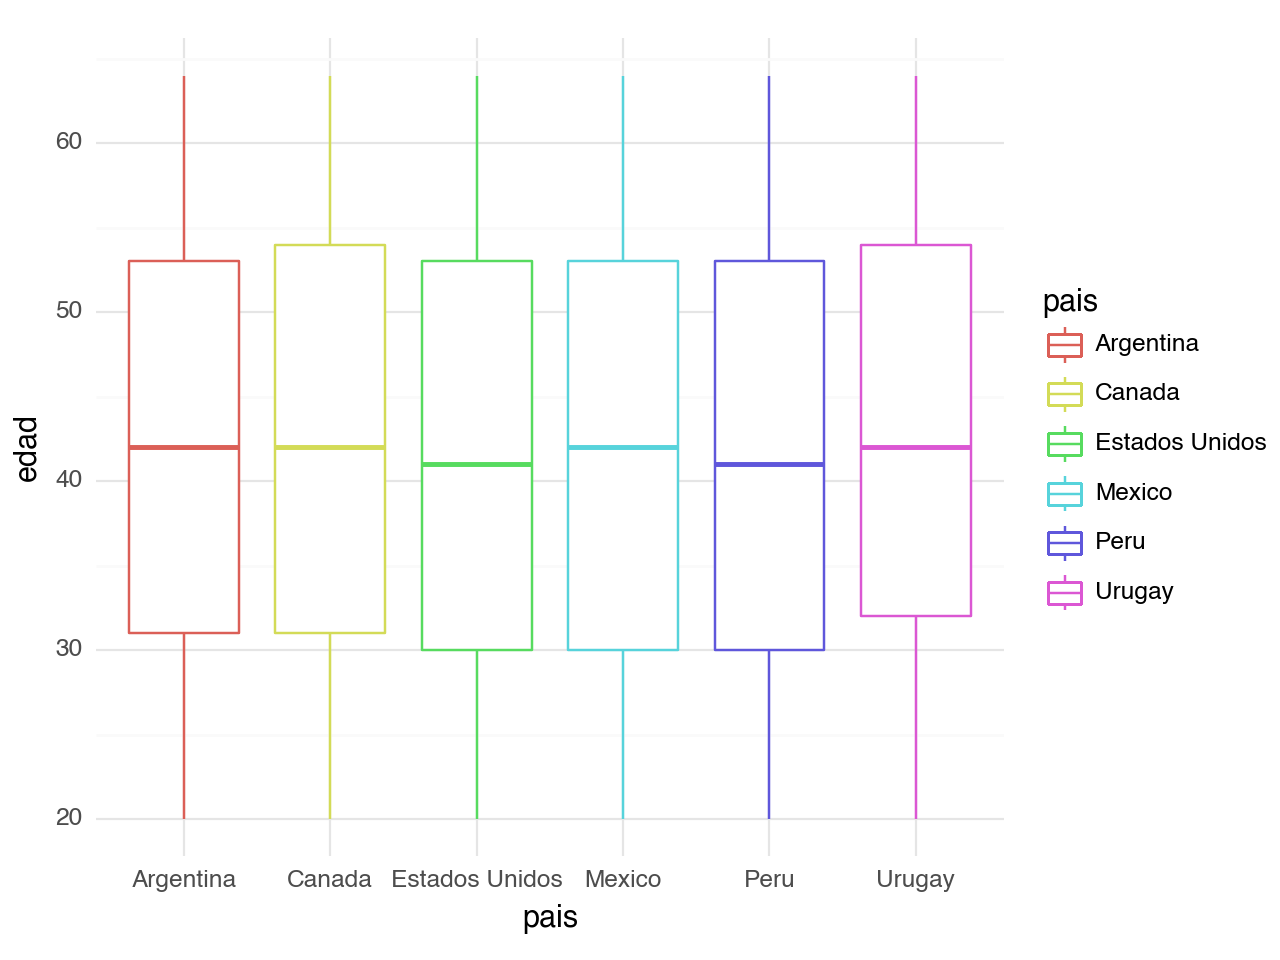

<Figure Size: (640 x 480)>

In [8]:
var = "edad"
p1 = ggplot( data.dropna(), aes( x= 'pais', y= var)) + geom_boxplot( aes(color= 'pais'))  +   theme_minimal()
index = data.loc[:, var].isna()
data.loc[ index , var] = data.loc[:, var].mean()
p1

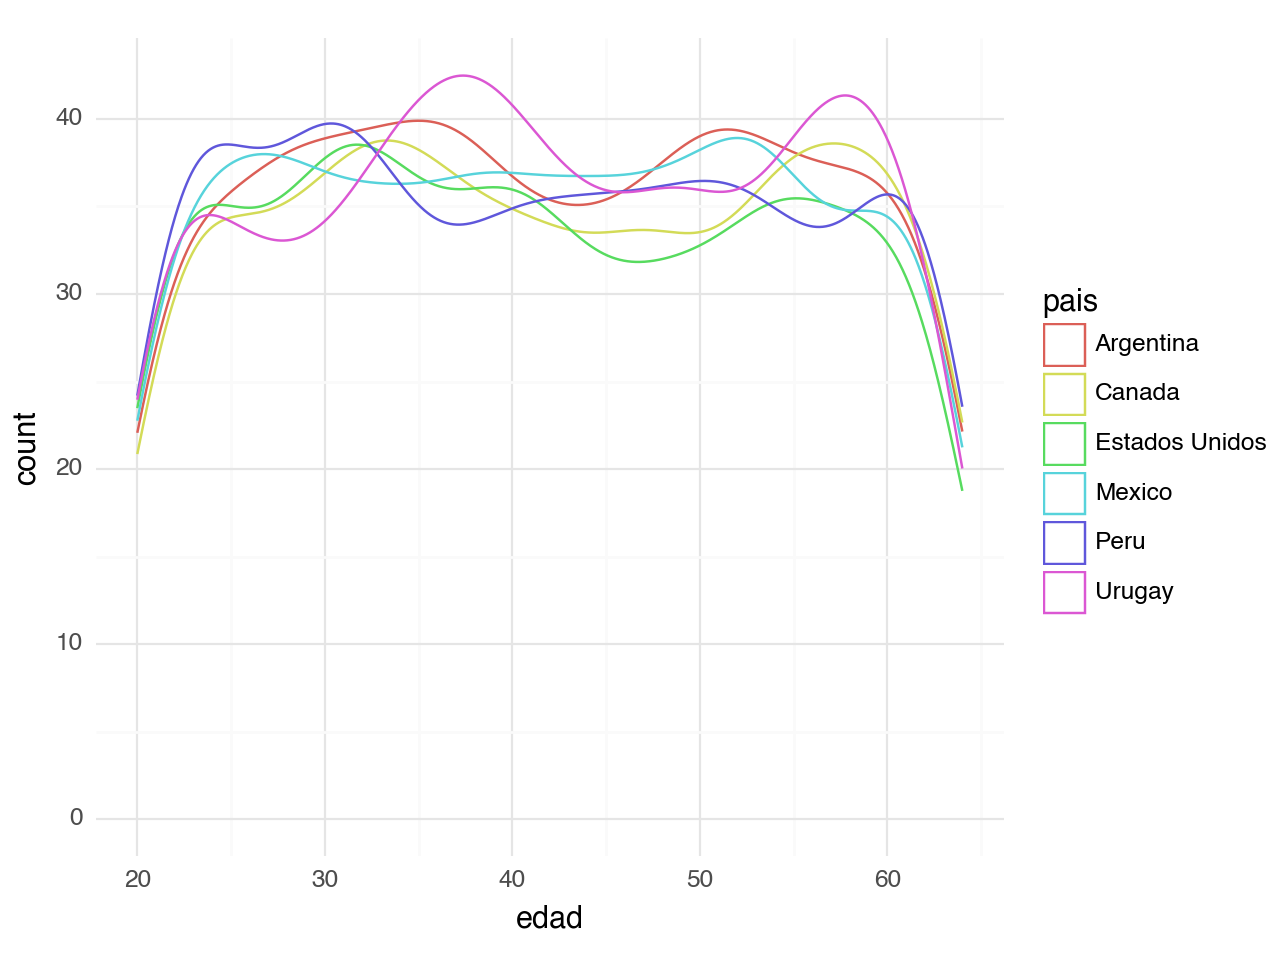

<Figure Size: (640 x 480)>

In [9]:
ggplot( data.dropna() , aes( x=var, color= 'pais')) + geom_density(aes(y=after_stat('count')), alpha=0.1) + theme_minimal()

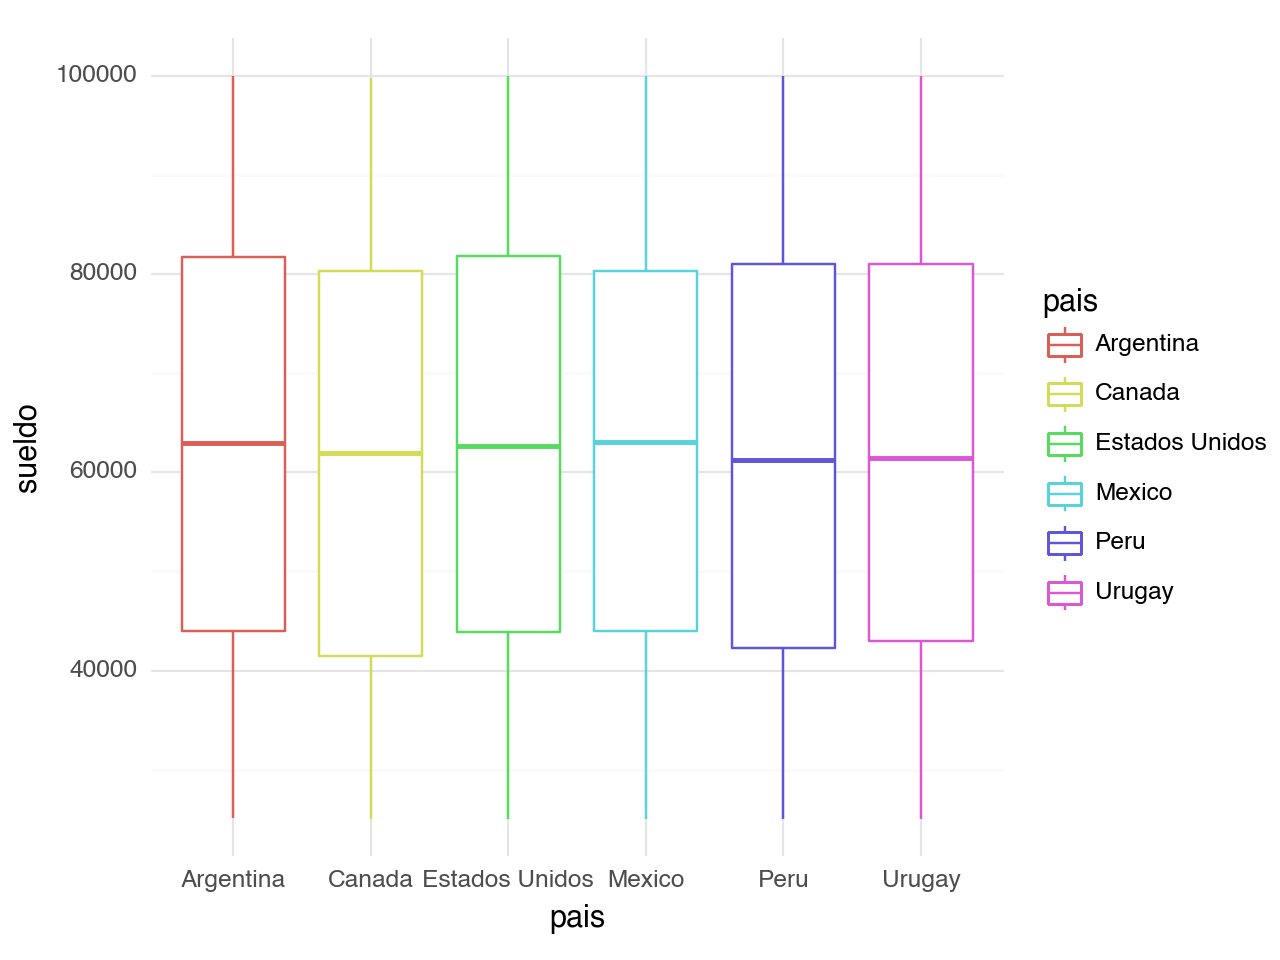

<Figure Size: (640 x 480)>

In [10]:
var = "sueldo"
p1 = ggplot( data.dropna(), aes( x= 'pais', y= var)) + geom_boxplot( aes(color= 'pais'))  +   theme_minimal() 
index = data.loc[:, var].isna()
data.loc[ index , var] = data.loc[:, var].mean()
data.loc[ index , var]
p1

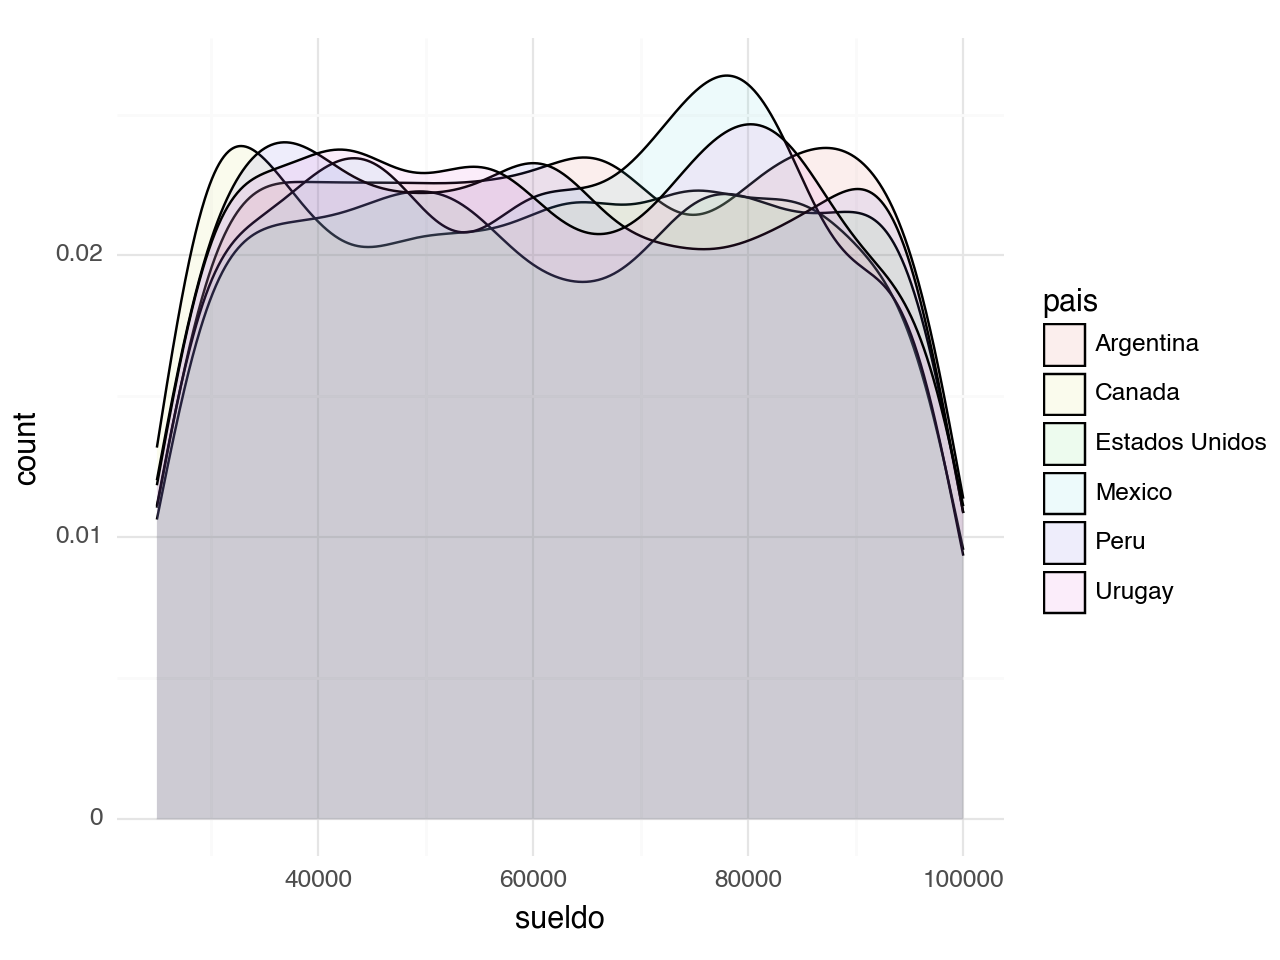

<Figure Size: (640 x 480)>

In [11]:
ggplot( data.dropna() , aes( x=var, fill= 'pais')) + geom_density(aes(y=after_stat('count')), alpha=0.1) + theme_minimal()

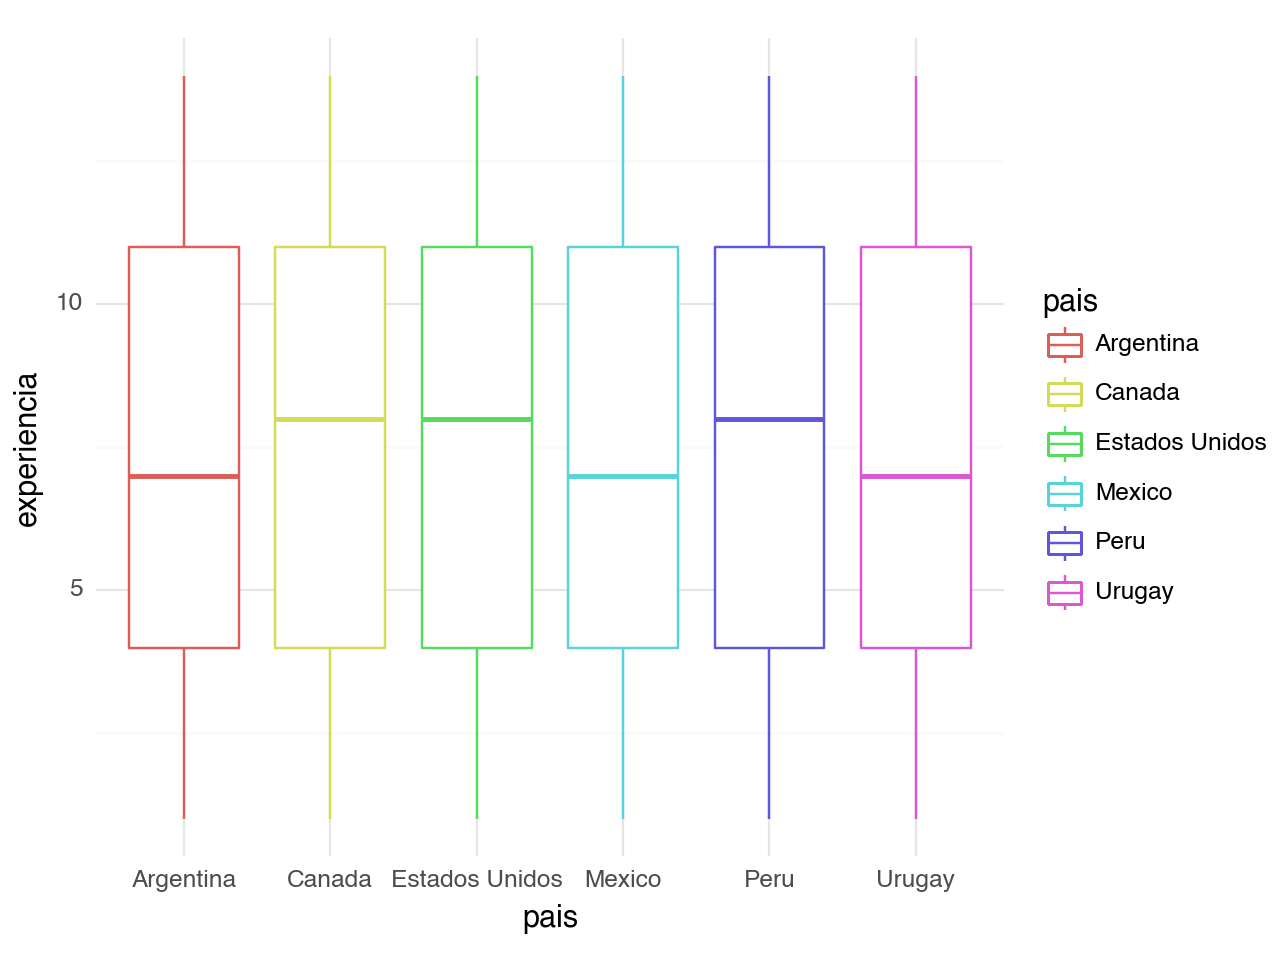

<Figure Size: (640 x 480)>

In [12]:
var = "experiencia"
p1 = ggplot( data.dropna(), aes( x= 'pais', y= var)) + geom_boxplot( aes(color= 'pais'))  +   theme_minimal() 
index = data.loc[:, var].isna()
data.loc[ index , var] = data.loc[:, var].mean()
data.loc[ index , var]
p1

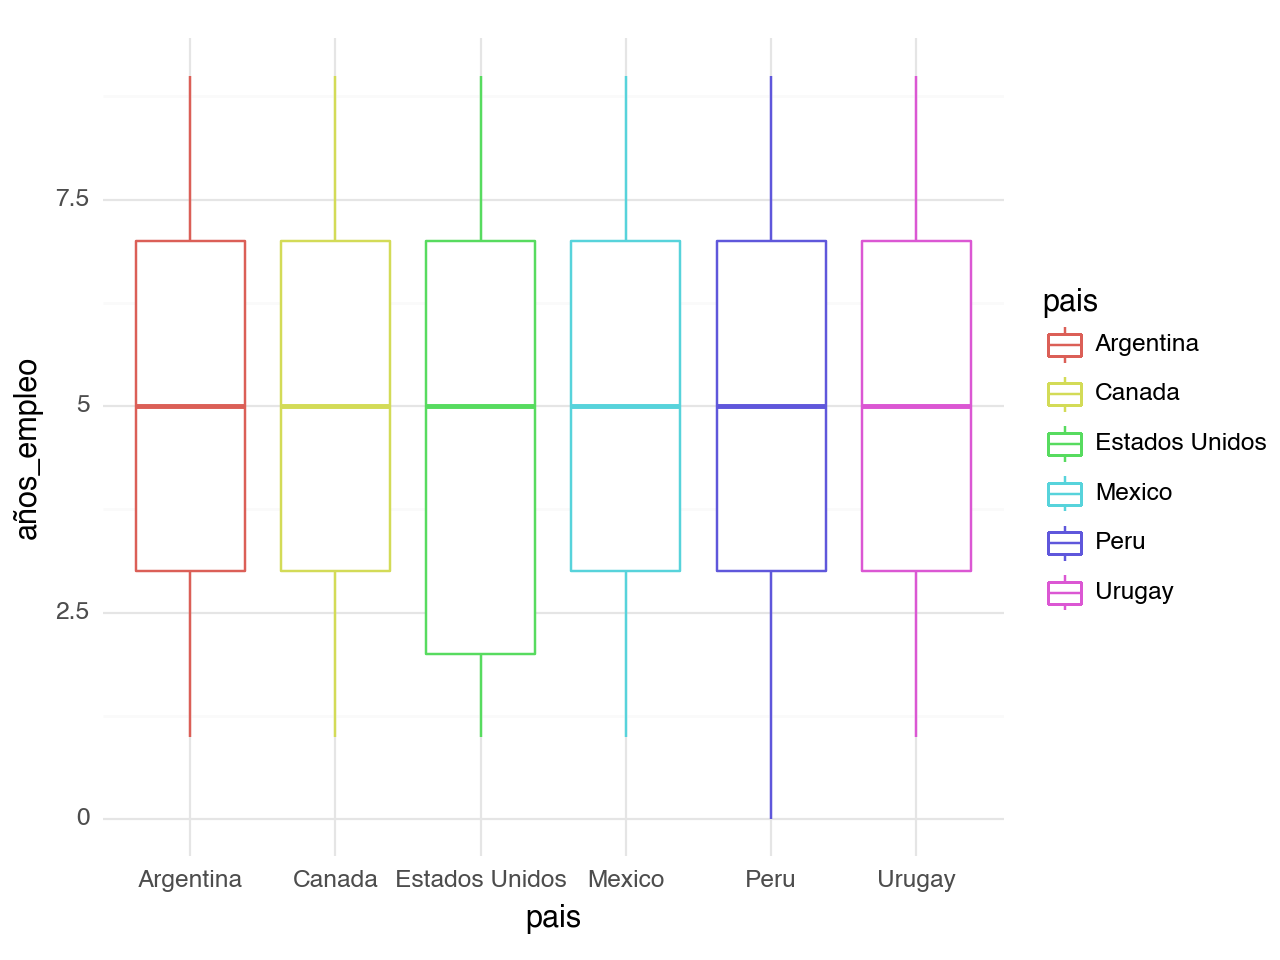

<Figure Size: (640 x 480)>

In [13]:
var = "años_empleo"
p1 = ggplot( data.dropna(), aes( x= 'pais', y= var)) + geom_boxplot( aes(color= 'pais'))  +   theme_minimal() 
index = data.loc[:, var].isna()
data.loc[ index , var] = data.loc[:, var].mean()
data.loc[ index , var]
p1

In [14]:
data.loc[ data.años_empleo==0, :]

,edad,sueldo,experiencia,años_empleo,etiqueta,pais
27,52.0,60962.0,2.0,0.0,C,Peru


In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
non_numerics = [ 'pais']
numerics_c = ['edad', 'experiencia', 'años_empleo']
ohe = OneHotEncoder(sparse_output=False).fit( data[non_numerics]) 
 

ohe_data = ohe.transform(data[non_numerics])
ohe_data = pd.DataFrame(ohe_data)
ohe_data.columns = ohe.get_feature_names_out()
data_alg = pd.concat( [data[numerics_c], ohe_data], axis=1) 
data_alg

,edad,experiencia,años_empleo,pais_Argentina,pais_Canada,pais_Estados Unidos,pais_Mexico,pais_Peru,pais_Urugay,pais_nan
0,21.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,53.0,9.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,60.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,64.0,7.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,64.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,62.0,13.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,63.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,21.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,47.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split( data_alg, 
                                                     data[['sueldo']], test_size=0.2, random_state=10) 

In [17]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.0009868159998149828

In [18]:
reg.score(X_test, y_test)

-0.0005616945632154202

In [19]:
data[['sueldo', 'edad', 'experiencia', 'años_empleo'] ].corr()

,sueldo,edad,experiencia,años_empleo
sueldo,1.000000,0.000308,-0.010843,0.019028
edad,0.000308,1.000000,0.020816,0.007193
experiencia,-0.010843,0.020816,1.000000,-0.002357
años_empleo,0.019028,0.007193,-0.002357,1.000000


  0%|                                                                                                                                                                                  | 0/9 [00:00<?, ?it/s]/Users/antonio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/antonio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.82it/s]


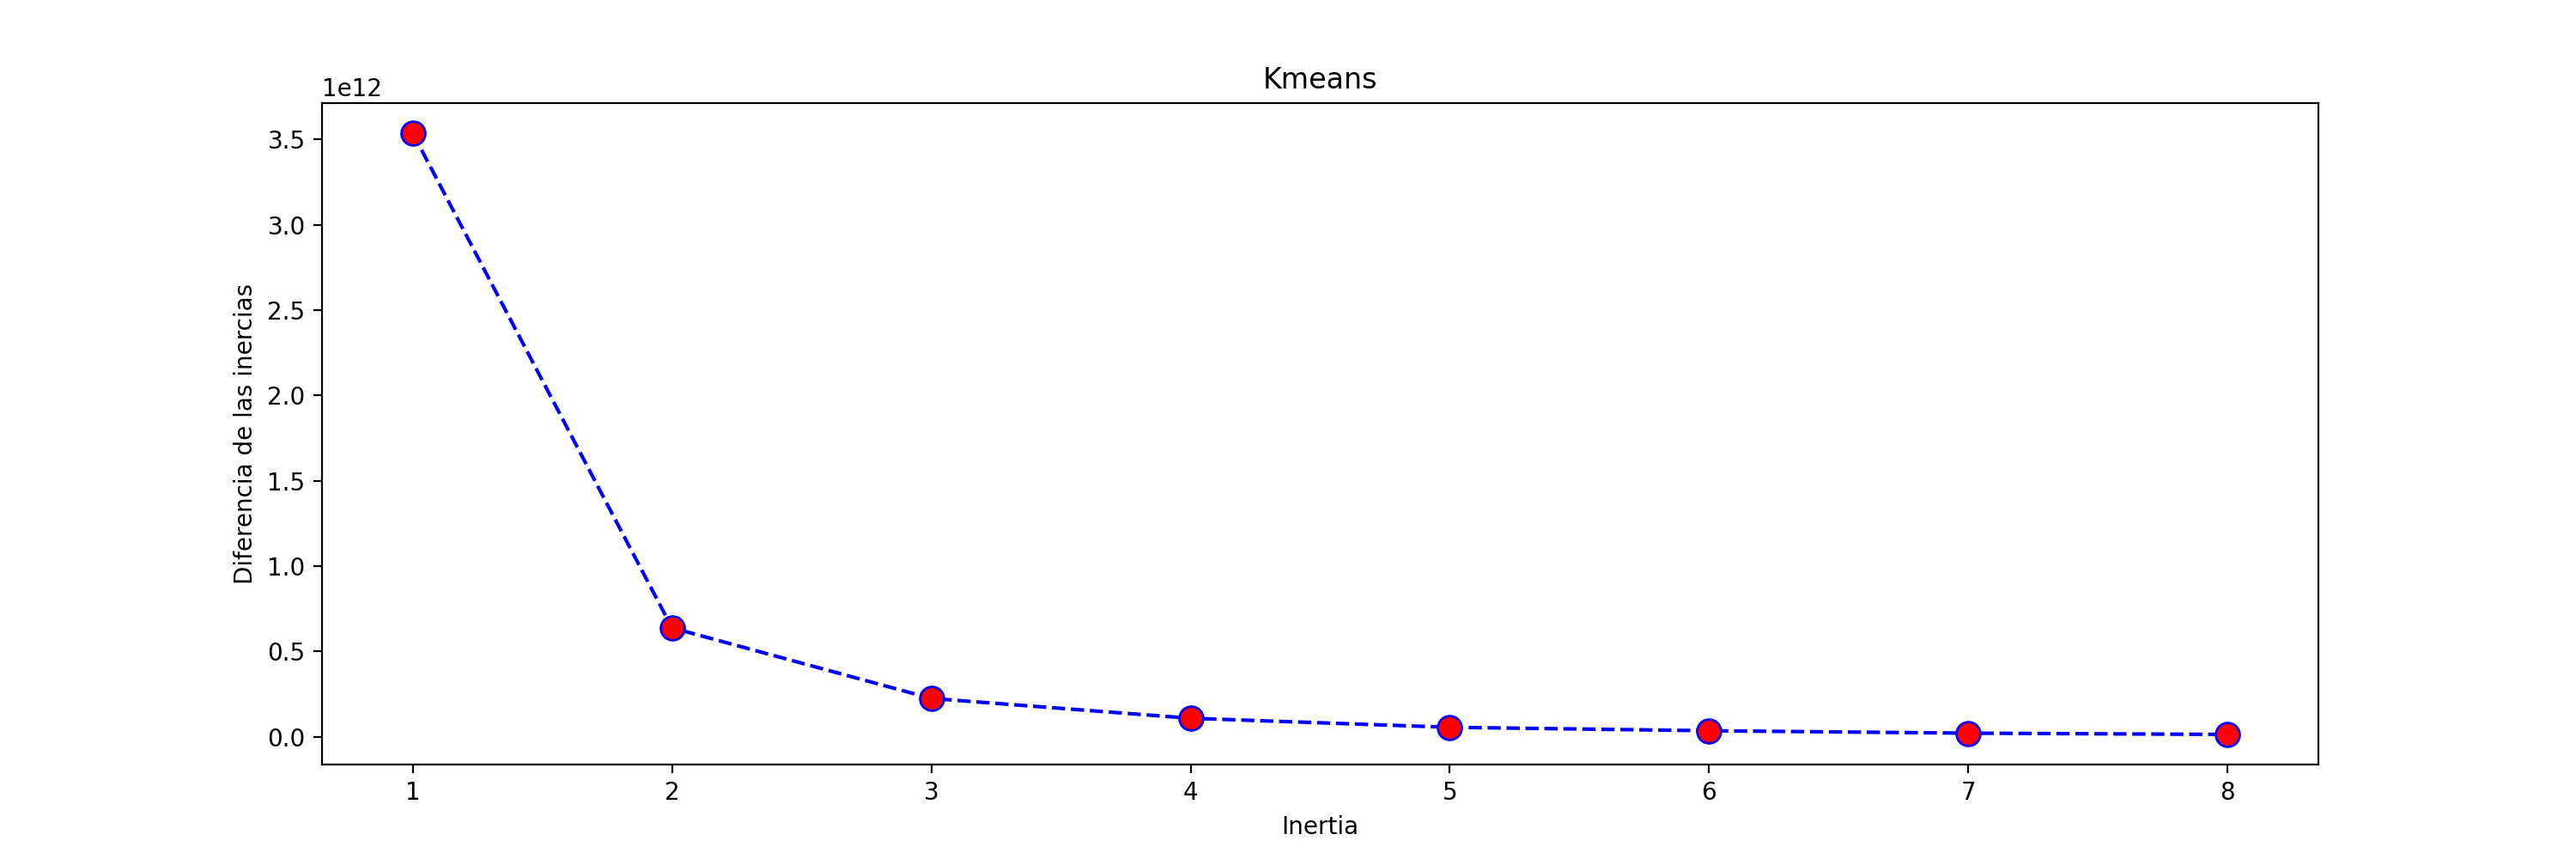

In [20]:
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
data_alg[['sueldo']] = data[['sueldo']]

k1 = []
inertia_s1 = []

for i in tqdm(range(1,10)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i, random_state=0 ).fit(data_alg)
    inertia_s1.append(kmeans1.inertia_)

# plot
plt.figure(figsize=(15,5))
plt.plot(k1[0:(len(k1)-1)], inertia_s1[0:(len(k1)-1)]- np.roll(inertia_s1, -1)[0:(len(k1)-1)] ,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Kmeans')
plt.xlabel('Inertia')
plt.ylabel('Diferencia de las inercias')
plt.show()

In [21]:
kmeans1 = KMeans(n_clusters=3, random_state=0 ).fit(data_alg)
data_alg['Cluster'] = kmeans1.labels_
data_alg

/Users/antonio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


,edad,experiencia,años_empleo,pais_Argentina,pais_Canada,pais_Estados Unidos,pais_Mexico,pais_Peru,pais_Urugay,pais_nan,sueldo,Cluster
0,21.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38271.000000,1
1,53.0,9.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,95558.000000,0
2,60.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41494.000000,1
3,64.0,7.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39885.000000,1
4,64.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44813.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,62.0,13.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56629.000000,2
9996,63.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28281.000000,1
9997,21.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,92087.000000,0
9998,47.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,62087.000000,2


In [22]:
data_alg[['etiqueta']] = data[['etiqueta']]
data_alg[['etiqueta', 'Cluster']].groupby(['etiqueta', 'Cluster'])['etiqueta'].count()

etiqueta  Cluster
A         0          1161
          1          1079
          2          1105
B         0          1160
          1          1107
          2          1060
C         0          1139
          1          1121
          2          1063
Name: etiqueta, dtype: int64

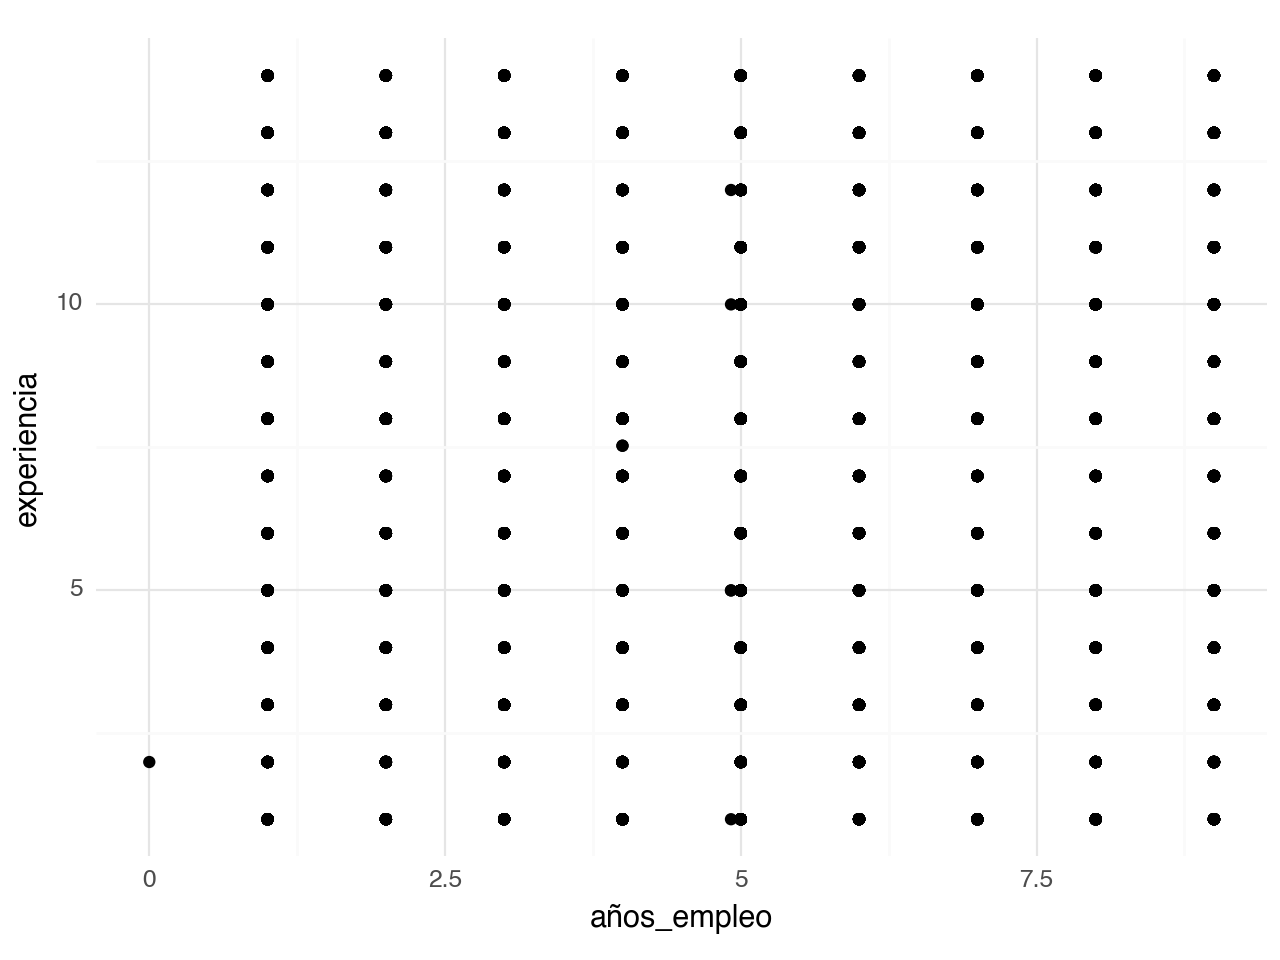

<Figure Size: (640 x 480)>

In [23]:
ggplot(data, aes(y='experiencia', x='años_empleo')) +geom_point() + theme_minimal()

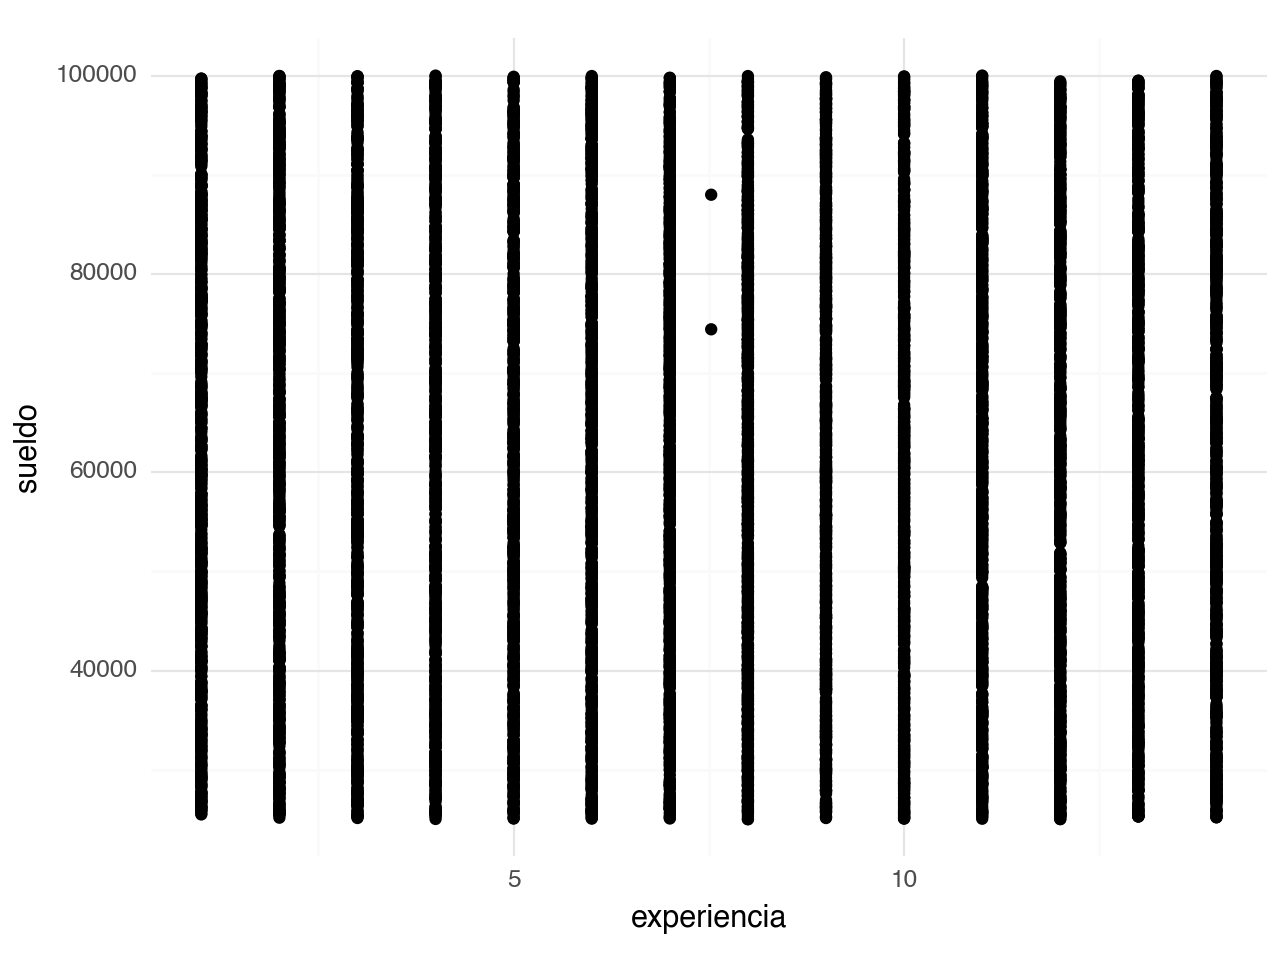

<Figure Size: (640 x 480)>

In [24]:
ggplot(data, aes(y='sueldo', x='experiencia')) +geom_point() + theme_minimal()

###  Resumen de hallazgos: 


*  Los datos originales no presentan registros duplicados
*  La mediana de edad y sueldo es similar a lo largo de los países 
*  El modelo de regresión lineal indica un muy pobre ajuste a los datos si utilizamos el país, la edad, años de experiencia y de empleo  como regresores del sueldo. 
*  Un número adecuado de clusters dentro del conjunto de datos es 3
